In [40]:
import pandas as pd

df = pd.read_csv('../data/exoTrain.csv')

print(df)

      LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0         2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1         2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2         2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3         2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4         2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   
...     ...      ...      ...      ...      ...      ...      ...     ...   
5082      1   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   
5083      1   989.75   891.01   908.53   851.83   755.11   615.78  595.77   
5084      1   273.39   278.00   261.73   236.99   280.73   264.90  252.92   
5085      1     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85   
5086      1   323.28   306.36   293.16   287.67   249.89   218.30  188.86   

       FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0

2

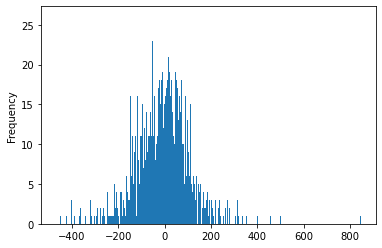

In [13]:
# Plot histogram for one row without label column
df.iloc[2, :-1].plot.hist(bins=1000)
df.iloc[2,0]

<AxesSubplot:ylabel='Frequency'>

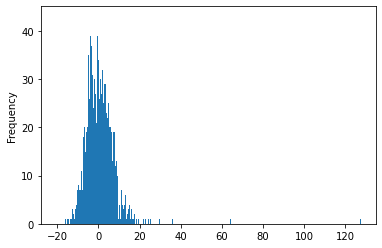

In [17]:
i = 0
while not df.iloc[i,0] == 1:
	i += 1
df.iloc[i, :-1].plot.hist(bins=1000)

In [20]:
import matplotlib.pyplot as plt

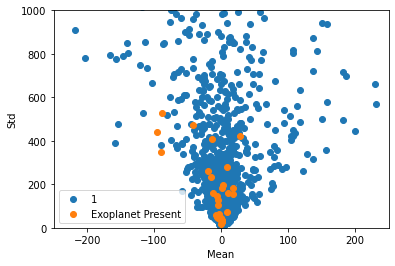

In [72]:
# Select rows with label 1
df1 = df[df['LABEL'] == 1]

# Select rows with label 2
df2 = df[df['LABEL'] == 2]

# Find mean and std for each row
df1_mean = df1.iloc[:,1:].mean(axis=1)
df1_std = df1.iloc[:,1:].std(axis=1)

df2_mean = df2.iloc[:,1:].mean(axis=1)
df2_std = df2.iloc[:,1:].std(axis=1)

# Plot scatter plot of mean and std
plt.scatter(df1_mean, df1_std, label='1')
plt.scatter(df2_mean, df2_std, label='Exoplanet Present')
plt.xlabel('Mean')
plt.ylabel('Std')
plt.xlim(-250,250)
plt.ylim(0,1e3)
plt.legend()
plt.show()

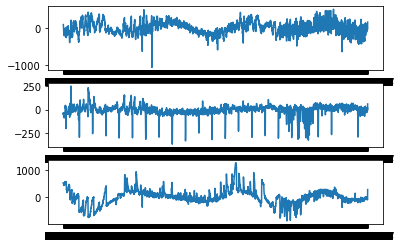

In [80]:
fig, axs = plt.subplots(3)
axs[0].plot(df2.iloc[0,1:])
axs[1].plot(df2.iloc[1,1:])
axs[2].plot(df2.iloc[2,1:])
plt.show()

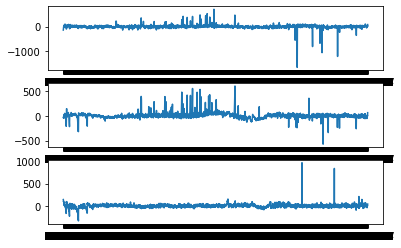

In [79]:
fig, axs = plt.subplots(3)
axs[0].plot(df1.iloc[0,1:])
axs[1].plot(df1.iloc[1,1:])
axs[2].plot(df1.iloc[2,1:])
plt.show()

In [29]:
df = pd.read_csv('../data/exoTest.csv')

print(len(df[df['LABEL'] == 1]))
print(len(df[df['LABEL'] == 2]))

565
5


In [35]:
import numpy as np

data = df.mean()+df.std()
labels = df['LABEL']

data.shape
labels.shape

(570,)

In [44]:
df['mean'] = df.iloc[:,1:].mean(axis = 1)
df['std'] = df.iloc[:,1:].std(axis = 1)

In [45]:
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197,mean,std
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54,9.953857,160.703348
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93,-7.427932,60.001638
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67,8.189087,281.832397
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98,-4.646587,103.222575
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54,-14.240660,407.057614


In [55]:
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, class_weight='balanced')
model.fit(df[["mean", "std"]], df["LABEL"])

SVC(class_weight='balanced', degree=2, kernel='poly')

In [49]:
df_test = pd.read_csv('../data/exoTest.csv')

df_test['mean'] = df_test.iloc[:,1:].mean(axis = 1)
df_test['std'] = df_test.iloc[:,1:].std(axis = 1)

In [58]:
import sklearn


preds = model.predict(df_test[["mean", "std"]])
sklearn.metrics.confusion_matrix(df_test["LABEL"], preds)

array([[  0, 565],
       [  0,   5]])